In [1]:
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def sobel(img):
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    grad = np.sqrt(grad_x ** 2 + grad_y ** 2)
    img = (grad * 255 / grad.max()).astype(np.uint8)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    # img = sobel(img)
    img = img / 255       
    return img

In [3]:
className = []
labelFile = "chinese_dataset/labels.csv"
data = pd.read_csv(labelFile)

for _, row in data.iterrows():
    className.append(row["Name"])

In [4]:
modelPath = "trained_model_chinese_local"
model = keras.models.load_model(modelPath)

In [5]:
testImagePath = "testImages"
imagePathList = os.listdir(testImagePath)
images = []

for x in imagePathList:
    img = cv2.imread(os.path.join(testImagePath, str(x)))
    images.append(img)

images = np.array(images)

<ipython-input-5-299971341afb>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images = np.array(images)


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Predict Success?
Speed 80 kmh ( 99.50022101402283 )


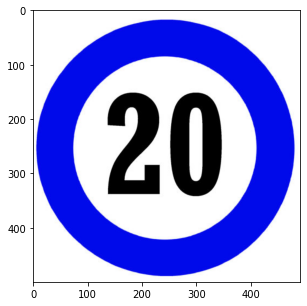

Predict Success?
Speed 30 kmh ( 100.0 )


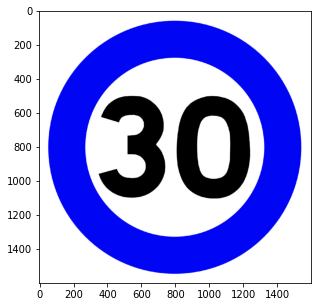

Predict Success?
Speed 70 kmh ( 99.99946355819702 )


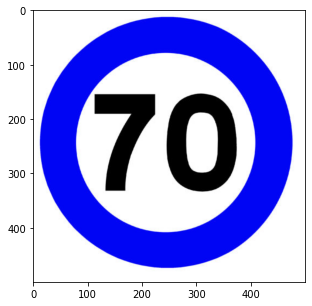

Speed 80 kmh ( 30.708158016204834 )


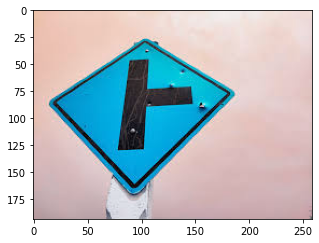

Predict Success?
Speed 30 kmh ( 100.0 )


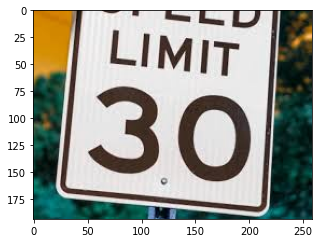

Predict Success?
Roundabout ( 99.55783486366272 )


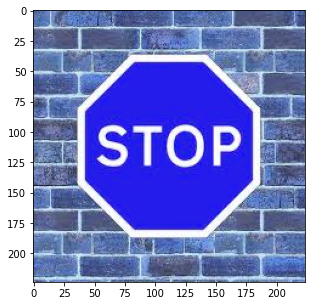

Tulisan China merah ( 68.76863241195679 )


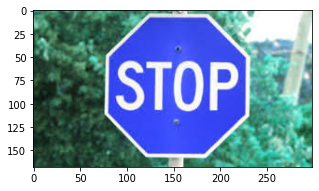

Predict Success?
Dilarang mendahului ( 97.07392454147339 )


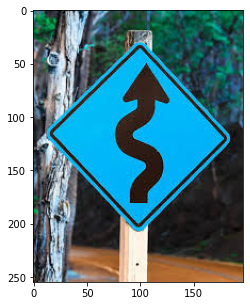

Predict Success?
Dilarang putar balik ( 99.9512791633606 )


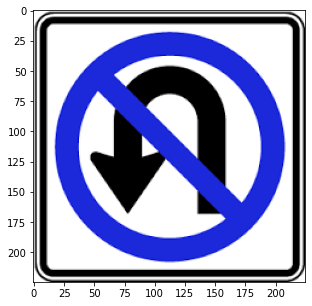

Predict Success?
Dilarang belok kanan ( 95.5210268497467 )


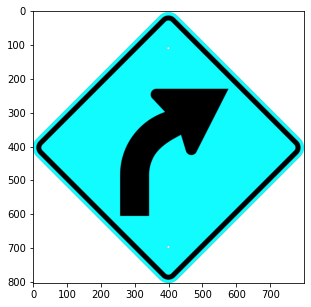

Hati-hati pagar ( 41.644349694252014 )


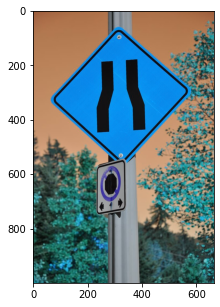

In [6]:
predictionThreshold = 0.7

for img in images:
    originalImage = img.copy()

    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 1)

    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue = np.amax(predictions)

    if probabilityValue > predictionThreshold:
        print("Predict Success?")
        print(className[int(classIndex)], "(", probabilityValue * 100, ")")
    else:
        print(className[int(classIndex)], "(", probabilityValue * 100, ")")

    plt.figure(figsize = (5, 5))
    plt.imshow(originalImage)
    plt.show()